In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

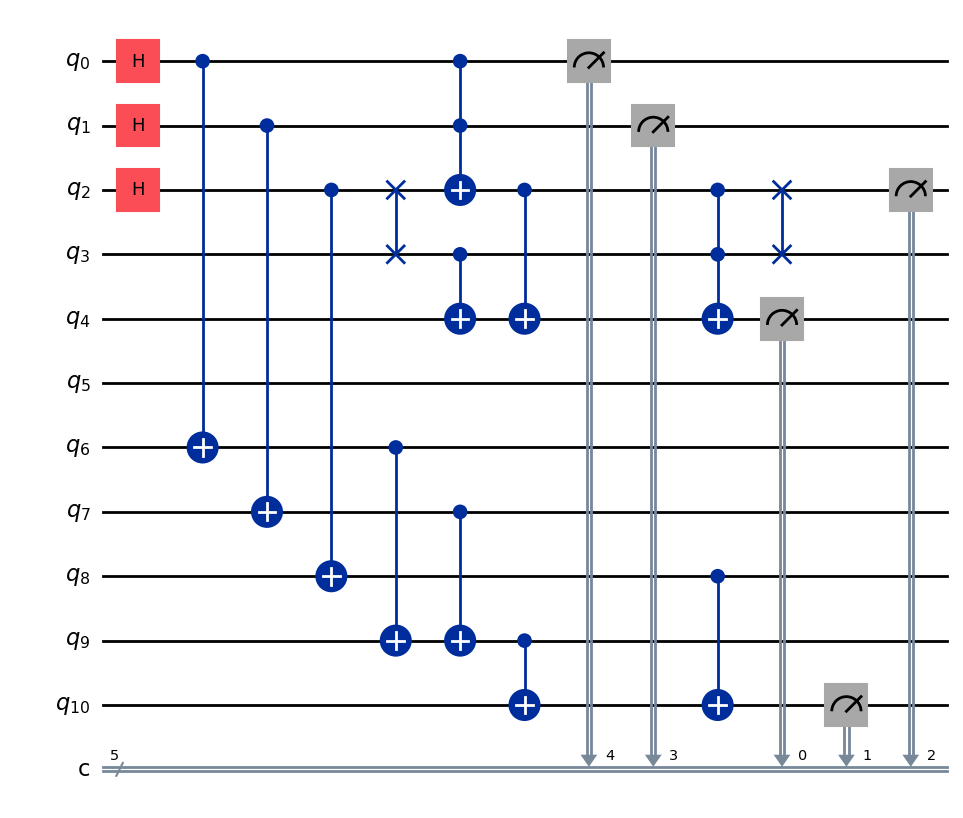

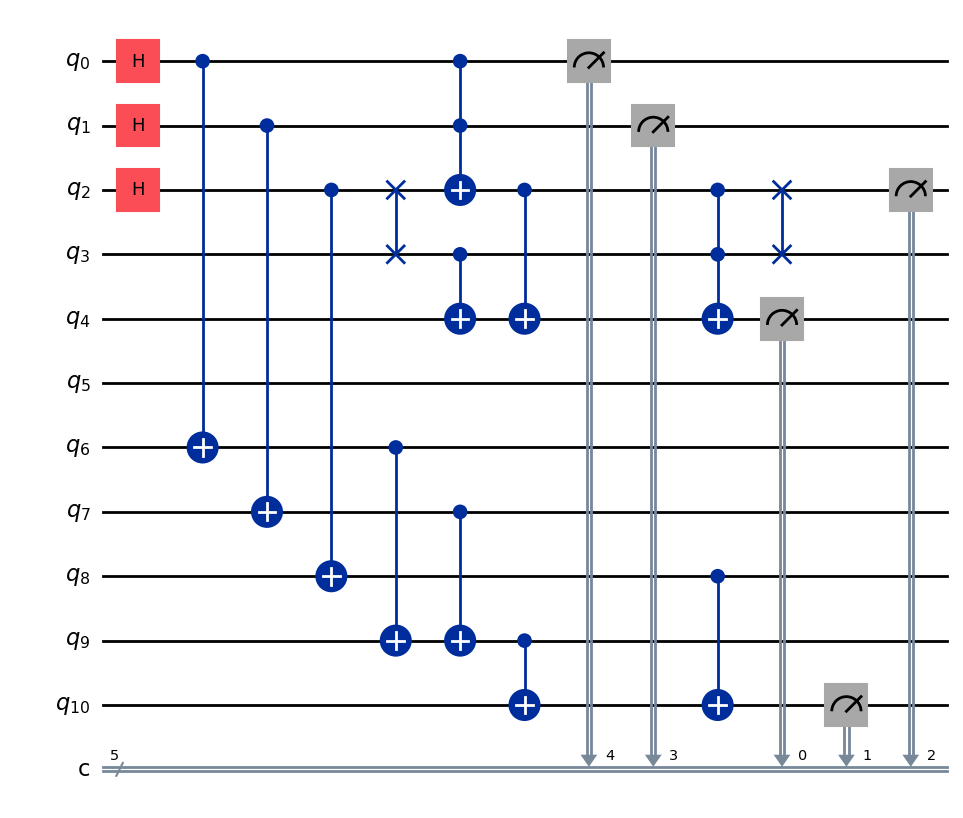

In [2]:
circuit = QuantumCircuit(11, 5)
circuit.h(0) # initalize input A
circuit.h(1)
circuit.h(2) # initalize input B
 
 
circuit.cx(0,6)
circuit.cx(1,7)
circuit.cx(2,8)
 

circuit.swap(3, 2)
circuit.ccx(0,1,2)
 
 
circuit.cx(3,4)
circuit.cx(2,4)
circuit.ccx(2,3,4)
circuit.swap(3, 2)
circuit.cx(6,9)
circuit.cx(7,9)
circuit.cx(9,10)
circuit.cx(8,10)


 
circuit.measure(0, 4)
circuit.measure(1, 3) 
circuit.measure(2, 2) 
circuit.measure(4, 0)
circuit.measure(10,1)
circuit.draw(output='mpl')

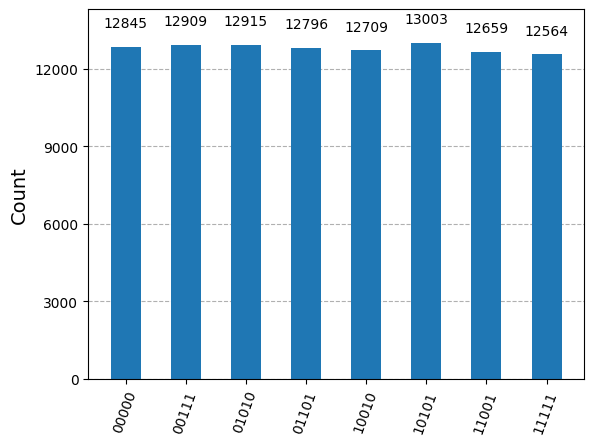

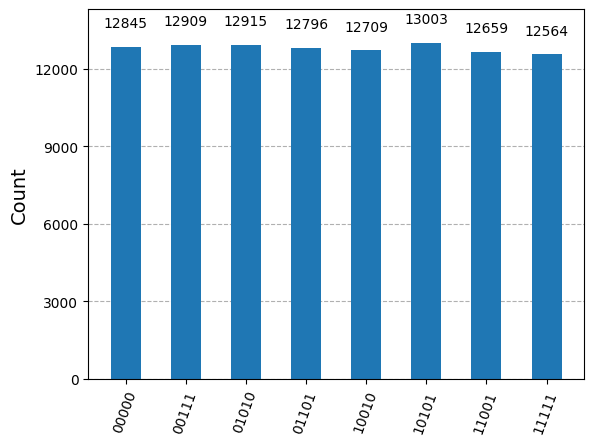

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=102400).result()
plot_histogram(result.get_counts())